In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [33]:
# Load the dataset
file_path = './spam_ham_dataset.csv'
data = pd.read_csv(file_path, encoding='ascii')


In [34]:
# Display the first few rows of the dataframe
data_head = data.head()
print(data_head)

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [35]:

current_columns = data.columns.tolist()
print('Current columns in the dataframe:', current_columns)



Current columns in the dataframe: ['Unnamed: 0', 'label', 'text', 'label_num']


In [36]:
# Then we will remove the unnecessary columns and clean the 'text' column
try:
    # Drop unnecessary columns
    data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
except KeyError as e:
    print('KeyError:', e)
    # If the columns are not found, we will try to remove the correct ones based on the output above
    data.drop(columns=['Unnamed: 0'], inplace=True)



KeyError: "['Unnamed: 0.1'] not found in axis"


In [37]:
# Remove newline characters
data['text'] = data['text'].str.replace('\r\n', ' ', regex=False)



In [38]:
# Display the cleaned dataframe head
data_head_cleaned = data.head()
print(data_head_cleaned)

  label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291 thi...          0
1   ham  Subject: hpl nom for january 9 , 2001 ( see at...          0
2   ham  Subject: neon retreat ho ho ho , we ' re aroun...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs this deal is to b...          0


In [39]:
# Vectorize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label_num'], test_size=0.3, random_state=42)


In [41]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [42]:
# Predict on test data
y_pred = nb_classifier.predict(X_test)

In [43]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.976159793814433


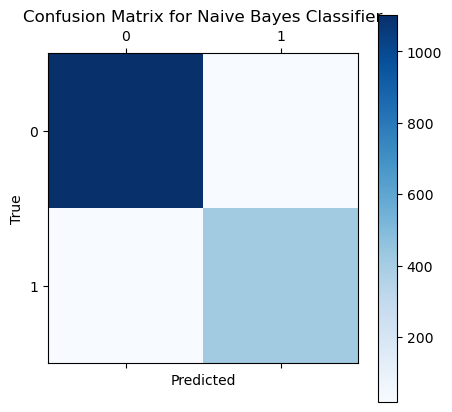

In [44]:
# Plot the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

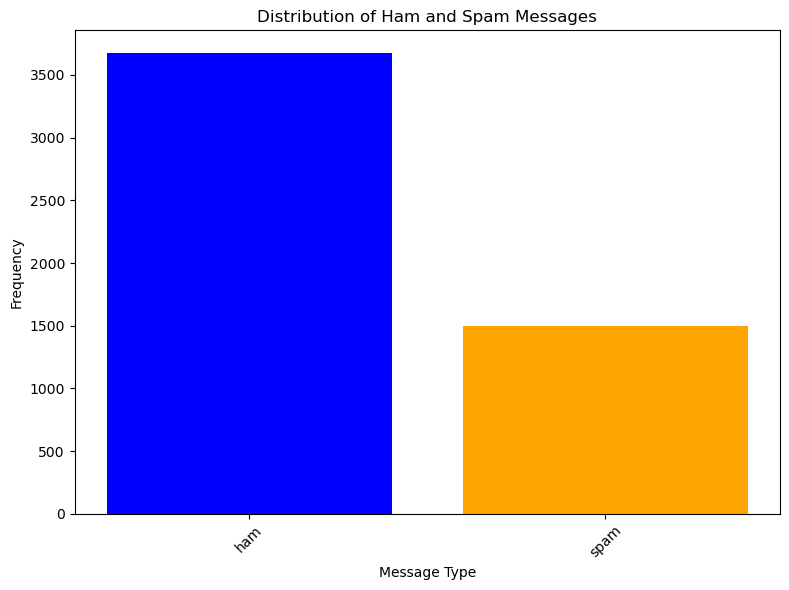

In [45]:

label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

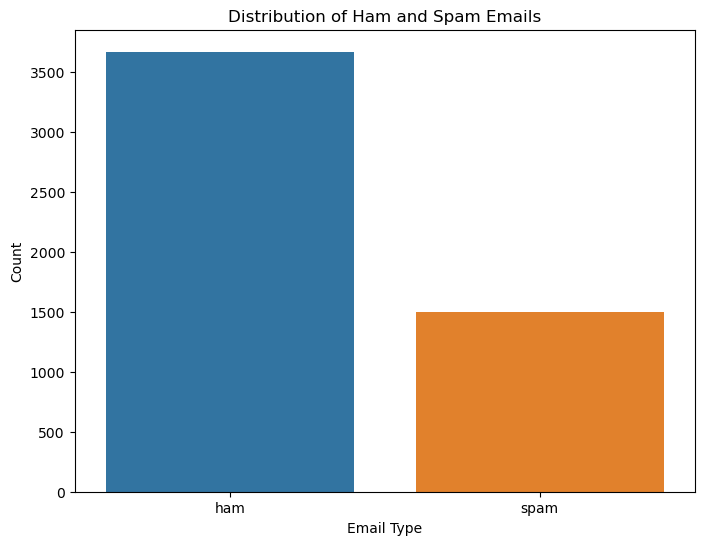

In [48]:
# Plot a bar graph for label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham and Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# Generate a word cloud for spam messages
spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
spam_wordcloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

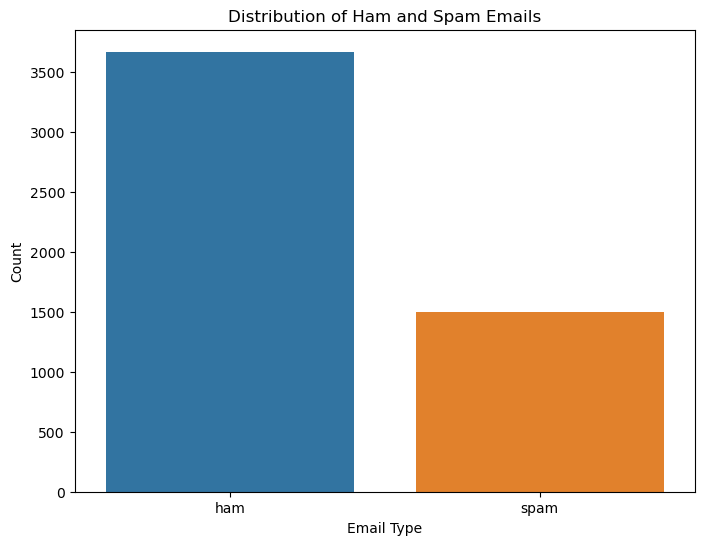

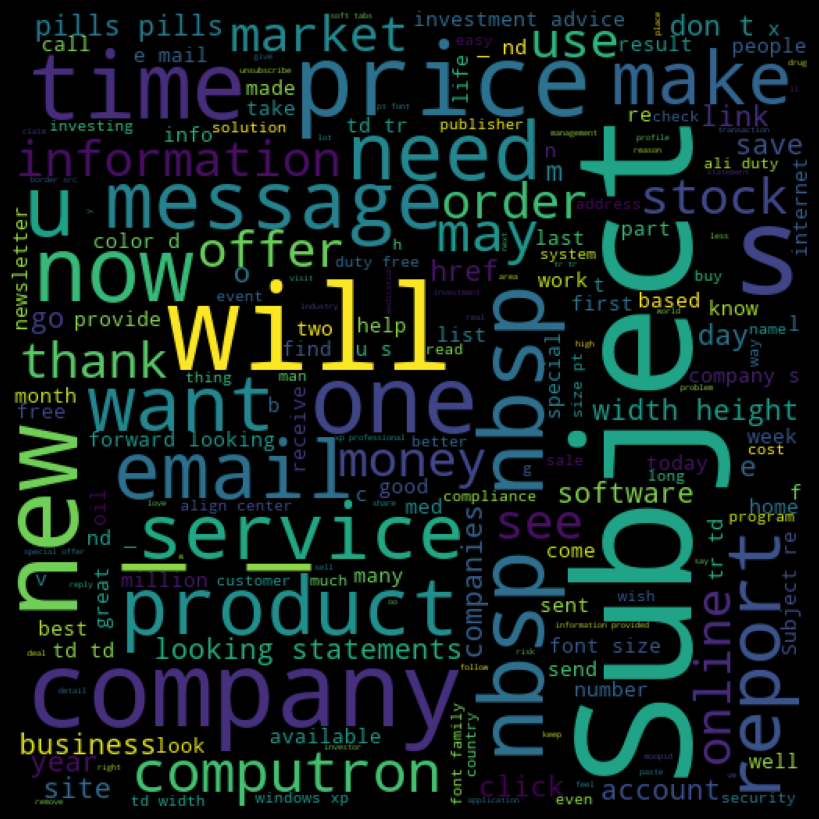

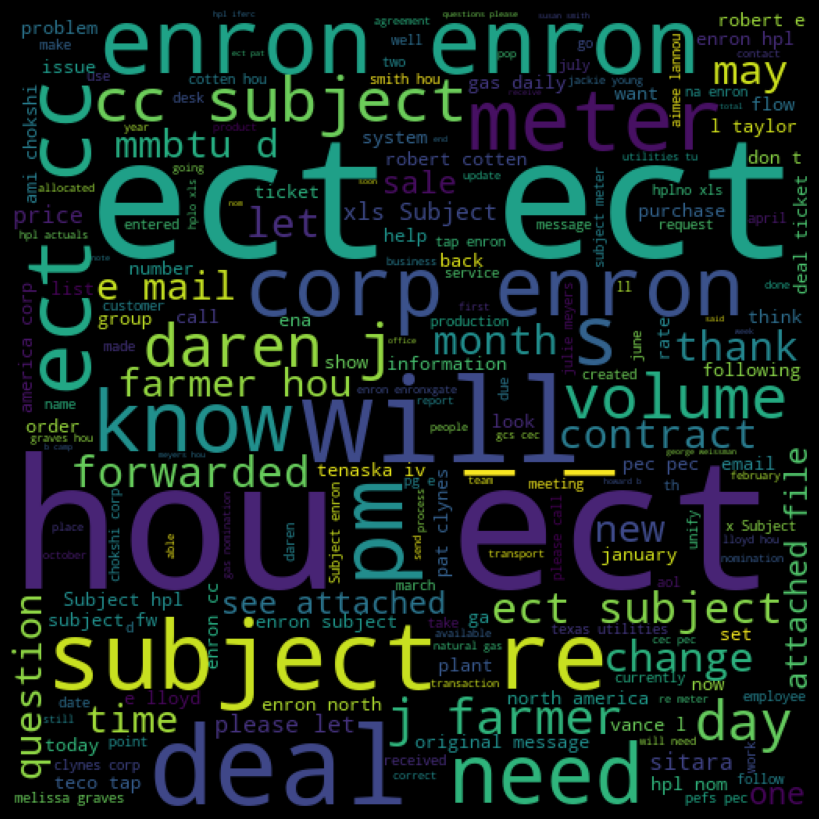

In [46]:
# Generate a word cloud for ham messages
ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))
ham_wordcloud = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()